In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rnd
import math

In [2]:
#Define Objective Function
def obj(x1,x2):
    return 4*x1 + 3*x2

In [3]:
#Define Constraints
def cons1(x1,x2):
    return x1 + x2 <=40
def cons2(x1,x2):
    return 2*x1 + x2 <= 60

In [10]:
#Define Algorithm
def gen_alg(pop_size, num_gen):
    #initialization
    pop = []
    fitness_hist = []
    
    for i in range(pop_size):
        x1 = rnd.uniform(0,40) #eq1, X2 = 0
        x2 = rnd.uniform(0,60)
        pop.append((x1,x2))
        
    best_sol = None
    best_fit = float('-inf') #will take the first soln
    
    for gen in range(num_gen):    
        #Evaluation
        fitness = [obj(x1,x2) for x1, x2 in pop]

        feasible_pop = [individual for individual in pop if cons1(individual[0],individual[1]) and cons2(individual[0],individual[1])]

        #Selection
        if feasible_pop:
            feasible_fitness = [obj(x1,x2) for x1,x2 in feasible_pop]
            parents = rnd.choices(feasible_pop, weights = feasible_fitness, k = pop_size)

        else:
            parents = []

            while len(parents) < pop_size:
                potential_parents = rnd.choice(pop,weights = fitness)
                if cons1(potential_parents[0], potential_parents[1]) and cons2(potential_parents[0], potential_parents[1]):
                    parents.append(potential_parents)
        #crossover
        offspring = []

        for i in range(pop_size):
            parent1,parent2 = rnd.choices(parents, k = 2)
            x1_child = rnd.uniform(min(parent1[0],parent2[0]),max(parent1[0],parent2[0]))
            x2_child = rnd.uniform(min(parent1[1],parent2[1]),max(parent1[1],parent2[1]))
            offspring.append((x1_child,x2_child))
            
        #Mutation
        mutation_rate = 1/(gen + 1) #Dynamic Mutation Rate
        for i in range(pop_size):
            if rnd.random()<mutation_rate: 
                offspring[i] = (rnd.uniform(0,40),rnd.uniform(0,60))
                
        #Elitism
        if best_sol is not None:
            offspring[0] = best_sol 
            
        pop = offspring
        
        #Optimal Solution
        
        feasible_sol = [(x1,x2) for (x1,x2) in pop if cons1(x1,x2) and cons2(x1,x2)]
        
        if feasible_sol:
            best_sol = max(feasible_sol, key = lambda x: obj(x[0],x[1]))
            best_fitness = obj(best_sol[0],best_sol[1])
            
        fitness_hist.append(best_fitness)
        
        print(best_sol, best_fitness)
    
    
    #plotting
        
    plt.plot(range(1,num_gen + 1), fitness_hist)
    plt.show()
        
    return best_sol, best_fitness
        

(16.701798124492736, 22.791017003326488) 135.18024350795042
(19.01540540699023, 20.91381294967965) 138.80306047699986
(19.01540540699023, 20.91381294967965) 138.80306047699986
(19.01540540699023, 20.91381294967965) 138.80306047699986
(19.01540540699023, 20.91381294967965) 138.80306047699986
(19.01540540699023, 20.91381294967965) 138.80306047699986
(19.01540540699023, 20.91381294967965) 138.80306047699986
(19.01540540699023, 20.91381294967965) 138.80306047699986
(19.01540540699023, 20.91381294967965) 138.80306047699986
(19.01540540699023, 20.91381294967965) 138.80306047699986
(19.01540540699023, 20.91381294967965) 138.80306047699986
(19.01540540699023, 20.91381294967965) 138.80306047699986
(19.01540540699023, 20.91381294967965) 138.80306047699986
(19.01540540699023, 20.91381294967965) 138.80306047699986
(19.01540540699023, 20.91381294967965) 138.80306047699986
(19.01540540699023, 20.91381294967965) 138.80306047699986
(19.01540540699023, 20.91381294967965) 138.80306047699986
(19.72086552

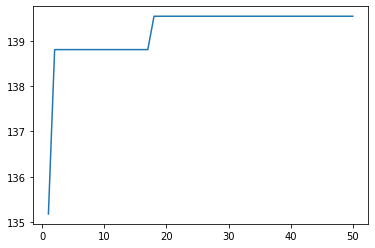

In [12]:
# Calling the Function

pop_size = 1000
num_gen = 50

best_sol, best_fitness = gen_alg(pop_size, num_gen)

